In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Part 1 - Neural Networks

In [2]:
df = pd.read_csv('BankRecords.csv')

In [3]:
df.head()

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes         No             No         No  
2                 No         No             No         No  
3                 No         No             No         No  
4                 No         No             No        Yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [5]:
df.describe()

ID          Age  Experience(Years)  Income(Thousands's)  \
count  5000.000000  5000.000000        5000.000000          5000.000000   
mean   2500.500000    45.338400          20.104600            73.774200   
std    1443.520003    11.463166          11.467954            46.033729   
min       1.000000    23.000000          -3.000000             8.000000   
25%    1250.750000    35.000000          10.000000            39.000000   
50%    2500.500000    45.000000          20.000000            64.000000   
75%    3750.250000    55.000000          30.000000            98.000000   
max    5000.000000    67.000000          43.000000           224.000000   

          Sort Code       Family  Credit Score  Mortgage(Thousands's)  
count   5000.000000  5000.000000   5000.000000            5000.000000  
mean   93152.503000     2.396400      1.937913              56.498800  
std     2121.852197     1.147663      1.747666             101.713802  
min     9307.000000     1.000000      0.000000               0.000000  
25%    91911.000000     1.000000      0.700000               0.000000  
50%    93437.000000     2.000000      1.500000               0.000000  
75%    94608.000000     3.000000      2.500000             101.000000  
max    96651.000000     4.000000     10.000000             635.000000

## 1. EDA
### 1.1 Target Variable Distribution

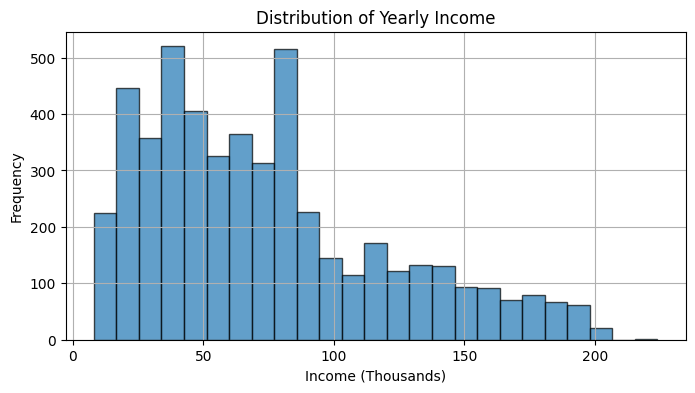

In [6]:
plt.figure(figsize=(8, 4))
plt.hist(df["Income(Thousands's)"], bins=25, edgecolor='k', alpha=0.7)
plt.title('Distribution of Yearly Income')
plt.xlabel('Income (Thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 1.2. Numerical Variables Distribution

In [7]:
numerical_variables = ['Age','Experience(Years)', 'Sort Code','Family','Credit Score',"Mortgage(Thousands's)"]

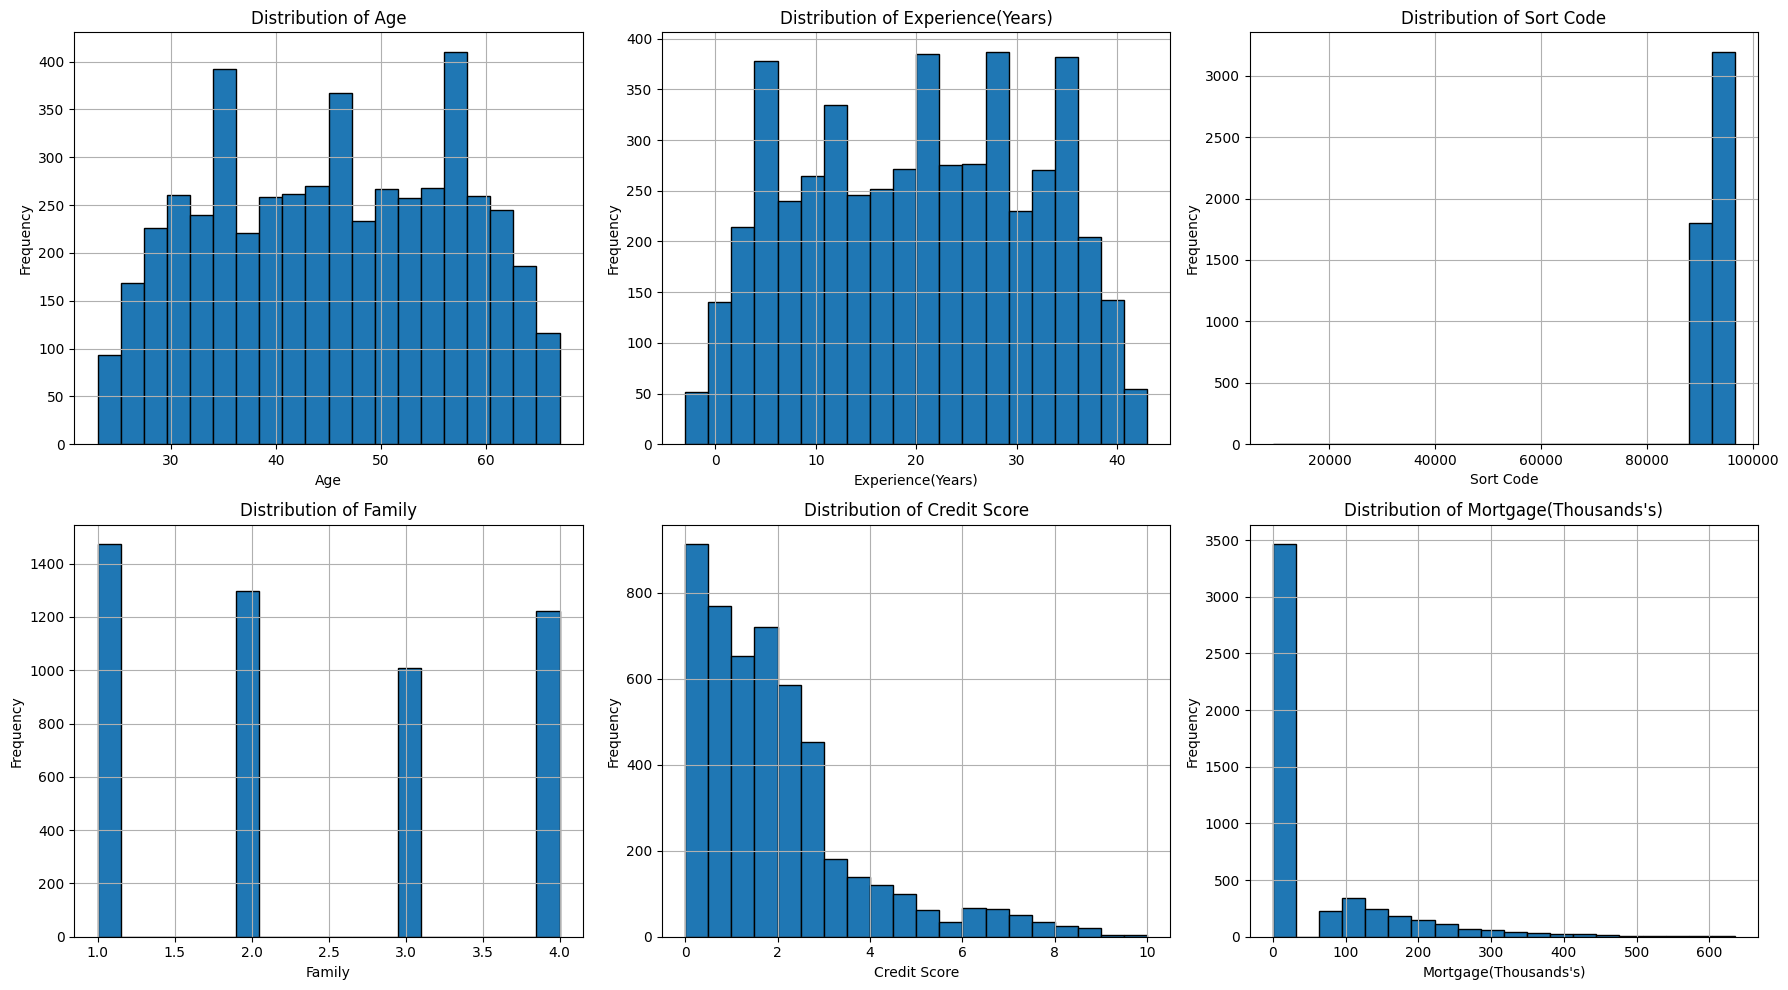

In [8]:
num_vars = len(numerical_variables)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

for i, var in enumerate(numerical_variables):
    axes[i].hist(df[var], bins=20, edgecolor='k')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)


plt.tight_layout()
plt.show()

### 1.3. Categorical Variables Distribution

In [9]:
categorical_variables = ['Education','Personal Loan','Securities Account','CD Account','Online Banking','CreditCard']

In [10]:
num_vars = len(categorical_variables)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

for i, var in enumerate(categorical_variables):
    counts = df[var].value_counts()
    axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

for i, var in enumerate(categorical_variables):
    df.boxplot(column="Income(Thousands's)", by=var, ax=axes[i], grid=False)
    axes[i].set_title(f'Income Distribution by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Income (Thousands)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### 1.4. Checking Linearity in numerical variables

In [12]:
corr_matrix = df[numerical_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 1.5. Analysing distribution of target variable after scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled['Scaled Income(Thousands)'] = scaler.fit_transform(df[["Income(Thousands's)"]])

plt.figure(figsize=(8, 4))
plt.hist(df_scaled['Scaled Income(Thousands)'], bins=25, edgecolor='k', alpha=0.7)
plt.title('Distribution of scaled Income (Thousands)')
plt.xlabel('Scaled Income (Thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 1.6. Insights gathered from EDA
1. The target variable is significantly skewed to the left, I've tried min-max and standard scaling but it didn't improve the skewness. Log Transformation helped a little, but due to the change it does to the values it will affect the evalution of the model. for the next phase, I'll scale the variable for a better model training.
   
2. By analysing the correlation matrix, it is clear that two variables are highly correlated: age and experience(Years). The high correlation can impact the accuracy of the model. Therefore, I'll train the model with and without one of the two variables aiming to improve its accuracy.

3. ID and Sort Code will not influence the accuracy of the income prediction model, therefore I will drop these columns

4. Apparently Experience(Years) contains negative values, which are clearly outliers since experience cannot be negative.

## 2. Data Preparation

### 2.1. Feature Selection

As mentioned earlier, these variables will only create noise in the analysis, so removing it is the best action.

In [15]:
df_cleaned = df.drop(['ID', 'Sort Code'], axis=1)

### 2.2. Filtering Inconsistencies

To prepare the Experience(Years) variable, I decided to replace the negative values with the median. The reason I chose median instead of mode for example, is that in this situation median is a better approach considering its non-skewed distribution and by being central value not affected by outliers, the mode could also be used but it could not represent the central tendency as effectively as the median. Ultimately, the adjusts worked very well considering it did not change much the properties of the variables as can be analsysed in the comparison of the statistics description below.

In [16]:
negative_values_count = (df_cleaned['Experience(Years)'] < 0).sum()
negative_values_count

52

In [17]:
df_cleaned['Experience(Years)'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience(Years), dtype: float64

In [18]:
median_experience = df['Experience(Years)'].median()

# replacing negative values with median
df.loc[df['Experience(Years)'] < 0, 'Experience(Years)'] = median_experience

# display summary statistics to verify the changes
print(df['Experience(Years)'].describe())

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience(Years), dtype: float64


### 2.3. Conversion of Data Types

Nearly all categorical variables have their values distributed between 'Yes' or 'No', therefore we just need to map the string to their respective binary values - Yes = 1, No = 0.

In [19]:
categorical_variables = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
for var in categorical_variables:
    df_cleaned[var] = df_cleaned[var].map({'Yes': 1, 'No': 0})

### 2.4. Encoding

The variable Education contains 3 different values, therefore enconding is necessary to use it in the model training

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_cleaned['Education'] = encoder.fit_transform(df_cleaned['Education'])

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5000 non-null   int64  
 1   Experience(Years)      5000 non-null   int64  
 2   Income(Thousands's)    5000 non-null   int64  
 3   Family                 5000 non-null   int64  
 4   Credit Score           5000 non-null   float64
 5   Education              5000 non-null   int64  
 6   Mortgage(Thousands's)  5000 non-null   int64  
 7   Personal Loan          5000 non-null   int64  
 8   Securities Account     5000 non-null   int64  
 9   CD Account             5000 non-null   int64  
 10  Online Banking         5000 non-null   int64  
 11  CreditCard             5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


## 3. Model Training 

### 3.1. Neural Network

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [28]:
X = df_cleaned.drop(["Income(Thousands's)"], axis=1)
y = df_cleaned["Income(Thousands's)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
model = Sequential()

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)

mse_nn = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
r2_nn = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# comparing some predicted results with their actual values
for i in range(10):
    print(f'Predicted: {y_pred[i][0]}, True: {y_test.iloc[i]}')

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 5632.1060 - val_loss: 979.3798
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1071.2174 - val_loss: 909.4861
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1024.4672 - val_loss: 884.2543
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 913.9443 - val_loss: 864.7230
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 974.7261 - val_loss: 844.9487
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 948.6030 - val_loss: 846.5450
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 887.9676 - val_loss: 817.9982
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 899.7565 - val_loss: 810.8362
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 910.8979 - val_loss: 796.7104
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 904.7546 - val_loss: 800.1079
Epoch 11/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 89

### 3.2. Results Scaling

* <b>No scaling</b>: mse = 820.56 / R2-score = 0.613
* <b>Standard Scaler</b>: mse = 706.46 / r2-score = 0.667
After the evaluation of the model, standard scaling improved the model's performance, so this is the scaling technique that will be used in the analysis

Notice: 
The lower the mse the better is the result, while the higher the r2-score the better.

### 3.3. Results Correlation variables

* <b>Not Removing</b>: mse = 725.61 / r2-score = 0.657
* <b>Removing</b>: mse = 706.46 / r2-score = 0.667

Though small, by removing one of the high correlate variables (Age) the model has demonstrated an improvement on the results, therefore I'll keep this change as part of the final model.

### 3.4. Hyperparameter Tuning

For the neural network model, I used GridSearch for hyperparameter tuning using Keras Tuner. Grid Search is a method that exhaustively evaluate a model performance via cross validation across a specified hyperparameter space. I defined a range of parameters including range of units in the the dense layers, activation functions, and types of optimisers. The tuner tested 100 different combinations to find the set of hyperparameters with the best results.

Despite the efforts on the exploration of the hyperparameters, the optimised model didn't significantly improve the accuracy of the model, the results were very similar to the one found previously.

In [ ]:
#pip install keras-tuner

In [111]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=16, max_value=128, step=16), activation=hp.Choice('activation1', ['relu', 'tanh', 'sigmoid', 'linear', 'elu', 'swish']), input_dim=X_train.shape[1]))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=128, step=16), activation=hp.Choice('activation2', ['relu', 'tanh', 'sigmoid', 'linear', 'elu', 'swish'])))
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd', 'adagrad']), loss='mean_squared_error')
    return model


In [121]:
tuner = kt.GridSearch(
    build_model,
    objective='val_loss',
    max_trials=100,  # Number of hyperparameter combinations to try
    directory='my_dir',
    project_name='grid_search'
)

Reloading Tuner from my_dir/grid_search/tuner0.json


In [122]:
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

In [123]:
best_hp = tuner.get_best_hyperparameters()[0]

best_model = tuner.hypermodel.build(best_hp)

best_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)


test_loss = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 - 0s - 3ms/step - loss: 7415.7026 - val_loss: 6376.8579
Epoch 2/100
100/100 - 0s - 364us/step - loss: 6362.9287 - val_loss: 4878.1226
Epoch 3/100
100/100 - 0s - 357us/step - loss: 4272.7495 - val_loss: 2712.1812
Epoch 4/100
100/100 - 0s - 357us/step - loss: 2201.1118 - val_loss: 1438.3517
Epoch 5/100
100/100 - 0s - 356us/step - loss: 1366.0374 - val_loss: 1122.4231
Epoch 6/100
100/100 - 0s - 347us/step - loss: 1185.0990 - val_loss: 1032.0132
Epoch 7/100
100/100 - 0s - 346us/step - loss: 1133.6429 - val_loss: 996.5726
Epoch 8/100
100/100 - 0s - 361us/step - loss: 1109.3445 - val_loss: 974.9590
Epoch 9/100
100/100 - 0s - 355us/step - loss: 1091.6382 - val_loss: 965.4587
Epoch 10/100
100/100 - 0s - 349us/step - loss: 1076.8643 - val_loss: 953.1546
Epoch 11/100
100/100 - 0s - 349us/step - loss: 1065.4561 - val_loss: 942.9802
Epoch 12/100
100/100 - 0s - 333us/step - loss: 1052.7418 - val_loss: 931.6920
Epoch 13/100
100/100 - 0s - 344us/step - loss: 1040.8633 - val_loss: 931.9099
Epo

## 4. Comparison with Standard ML Models

### 4.1. Cross-validation with Stratified K-Fold

In [55]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsRegressor

In [56]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor()
}

In [57]:
X = df_cleaned.drop(["Income(Thousands's)"], axis=1)
y = df_cleaned["Income(Thousands's)"]

kfold = KFold(n_splits=5, random_state=42, shuffle=True) 

results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results[name] = cv_results
    print(f"{name}: Mean MSE: {cv_results.mean()} Std: {cv_results.std()}")

Linear Regression: Mean MSE: -1011.0655389515352 Std: 77.28980806134717
Decision Tree: Mean MSE: -678.3564222222222 Std: 54.76110686040753
Random Forest: Mean MSE: -393.65661810893016 Std: 27.944787244823893
Gradient Boosting: Mean MSE: -697.977135441819 Std: 45.772494841377934
KNN: Mean MSE: -1122.977248 Std: 99.37290138690129


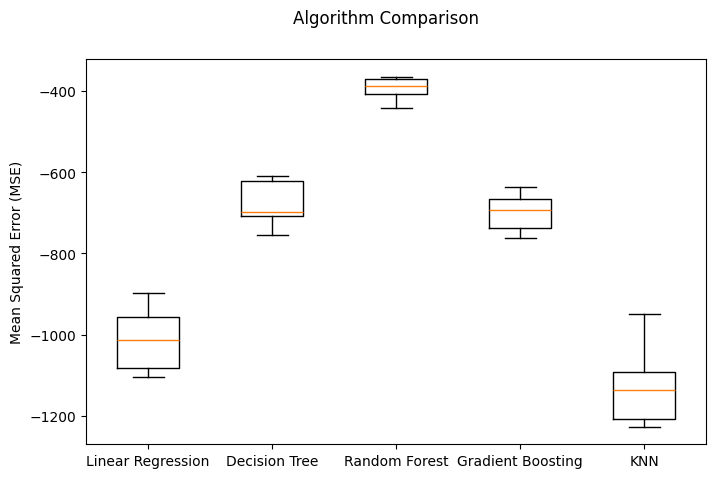

In [58]:
# results comparison
fig = plt.figure(figsize=(8, 5))  # creating figure
fig.suptitle('Algorithm Comparison')  # title
ax = fig.add_subplot(111)
plt.boxplot(list(results.values()))  # making a box plot for each model's results
ax.set_xticklabels(models)  # use the model names as x-axis labels
plt.ylabel('Mean Squared Error (MSE)')  # label for the y-axis
plt.show()  # display the plot

### 4.2. Selecting Model

#### 4.2.1. Random Forest

In [96]:
from sklearn.metrics import mean_squared_error, r2_score # importing regressor chosen evaluation metrics

random_forest_model = RandomForestRegressor(n_estimators=1200, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1200, random_state=42)

In [97]:
y_pred_rf = random_forest_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf}")

r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared: {r2_rf}")

Mean Squared Error: 381.2708335536176
R-squared: 0.8201994475798827


#### 4.2.2. Decision Tree Regressor

In [77]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [78]:
y_pred_dt = decision_tree_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse_dt}")

r2_dt = r2_score(y_test, y_pred_dt)
print(f"R-squared: {r2_dt}")

Mean Squared Error: 635.38675
R-squared: 0.7003628953580654


#### 4.2.3 Gradient Boosting Regressor

In [79]:
gradBoost_model = GradientBoostingRegressor(random_state=42)
gradBoost_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [81]:
y_pred_gb = gradBoost_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse_gb}")

r2_gb = r2_score(y_test, y_pred_gb)
print(f"R-squared: {r2_gb}")

Mean Squared Error: 666.0342834571719
R-squared: 0.6859100629854611


#### 4.2.4 Comparing Standard ML Models Results

In [84]:
models = ['Random Forest', 'Decision Tree', 'GradientBoosting']

mse_scores = [mse_rf, mse_dt, mse_gb]
r2_scores = [r2_rf,r2_dt, r2_gb]

x = np.arange(len(models))  

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(x, mse_scores, color='b', width=0.4)
ax1.set_title('Comparison of MSE')
ax1.set_ylabel('Mean Squared Error')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

ax2.bar(x, r2_scores, color='r', width=0.4)
ax2.set_title('Comparison of R²-score')
ax2.set_ylabel('R² Score')
ax2.set_xticks(x)
ax2.set_xticklabels(models)

plt.tight_layout()
plt.show();

#### Selected Model = Random Forest

### 4.3 Hyperparameter Tuning Selected Model

In [91]:
from sklearn.model_selection import GridSearchCV # importing GridSearchCV

param_grid = {
    'n_estimators': [1000, 1200],
    'max_depth': [None, 30, 80],
    'min_samples_split': [2, 8, 15], 
    'min_samples_leaf': [1, 6, 9],
    'max_features': [0.5, 0.2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END bootstrap=True, max_depth=None, max_features=2.0, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=2.0, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=2.0, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=2.0, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=2.0, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=2.0, min_samples_leaf=6, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=2.0, min_samples_leaf=6, min_samples_split=8, n_estimators=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   3.2s
[CV] END bootstrap=True, max_depth=None, max_features=0.5, min_samples_leaf=6, min_samples_split=8, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, max_features=0.5, min_samples_leaf=6, min_samples_split=15, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=0.5, min_samples_leaf=9, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END bootstrap=True, max_depth=None, max_features=0.5, min_samples_leaf=9, min_samples_split=15, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, max_features=0.2, min_samples_leaf=1, min_samples_split=8, n_estimators=1200; total time=   2.4s
[CV] END bootstrap=True, max_de

## Explain here the some of the best parameters found

### 4.3. Comparing Neural Network with Random Forest

In [65]:
models = ['Neural Network', 'Random Forest']

mse_scores = [mse_nn, mse_rf]
r2_scores = [r2_nn,r2_rf]

x = np.arange(len(models))  

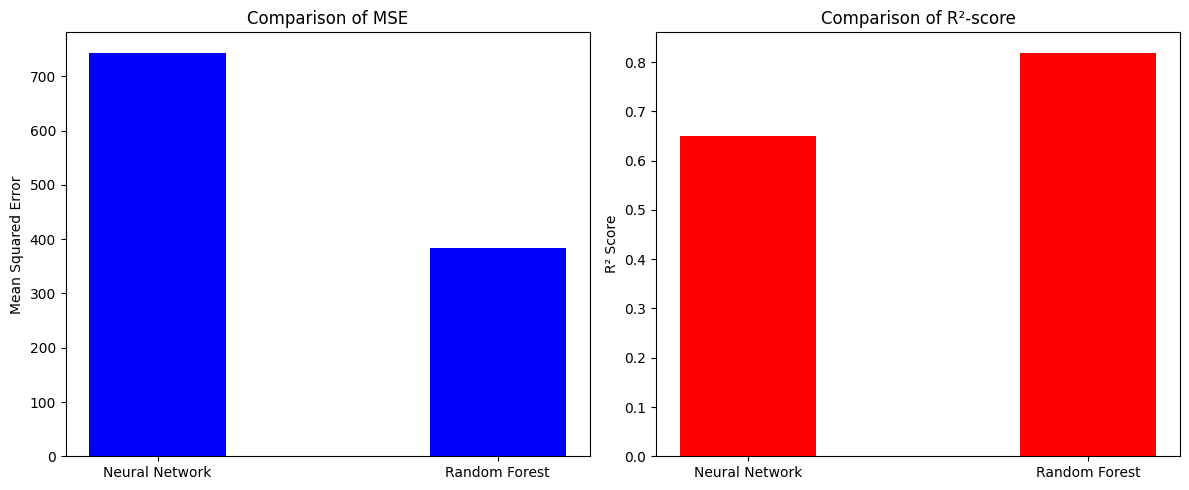

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(x, mse_scores, color='b', width=0.4)
ax1.set_title('Comparison of MSE')
ax1.set_ylabel('Mean Squared Error')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

ax2.bar(x, r2_scores, color='r', width=0.4)
ax2.set_title('Comparison of R²-score')
ax2.set_ylabel('R² Score')
ax2.set_xticks(x)
ax2.set_xticklabels(models)

plt.tight_layout()
plt.show();

## Explain here why I chose Random Forest

## 5. New Customer Income

In [105]:
np.random.seed(42)

new_customer = {
    'Age': np.random.randint(18, 71),
    'Experience(Years)': np.random.randint(0, 53),
    'Family': np.random.randint(1, 5),
    'Credit Score': np.random.uniform(0.0, 5.0),
    'Education': np.random.randint(0, 2),
    'Mortgage(Thousands\'s)': np.random.randint(0, 500),
    'Personal Loan': np.random.randint(0, 1),
    'Securities Account': np.random.randint(0, 1),
    'CD Account': np.random.randint(0, 1),
    'Online Banking': np.random.randint(0, 1),
    'CreditCard': np.random.randint(0, 1)
}

new_customer = pd.DataFrame([new_customer])
print(new_customer)

   Age  Experience(Years)  Family  Credit Score  Education  \
0   56                 51       1      0.917174          1   

   Mortgage(Thousands's)  Personal Loan  Securities Account  CD Account  \
0                    188              0                   0           0   

   Online Banking  CreditCard  
0               0           0  


In [110]:
new_customer_scaled = scaler.fit_transform(new_customer)
random_forest_model.predict(new_customer_scaled)[0]

91.52591666666667

# Part 2 - Sentiment Analysis